In [56]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV,train_test_split,KFold
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [3]:
data=pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722,114.70
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776,114.72
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468,114.71
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670,114.72
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311,114.72
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559,111.61
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917,111.78
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912,110.19
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227,110.74


# performing the basic EDA functions 

In [67]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   CDP     15039 non-null  float64
 8   CO      15039 non-null  float64
 9   NOX     15039 non-null  float64
 10  TEY     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [59]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
CDP      3611
CO      13096
NOX     11996
TEY      4207
dtype: int64

In [6]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

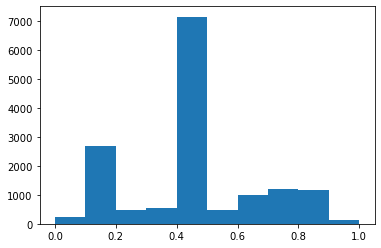

In [68]:
plt.hist(data1.TEY)

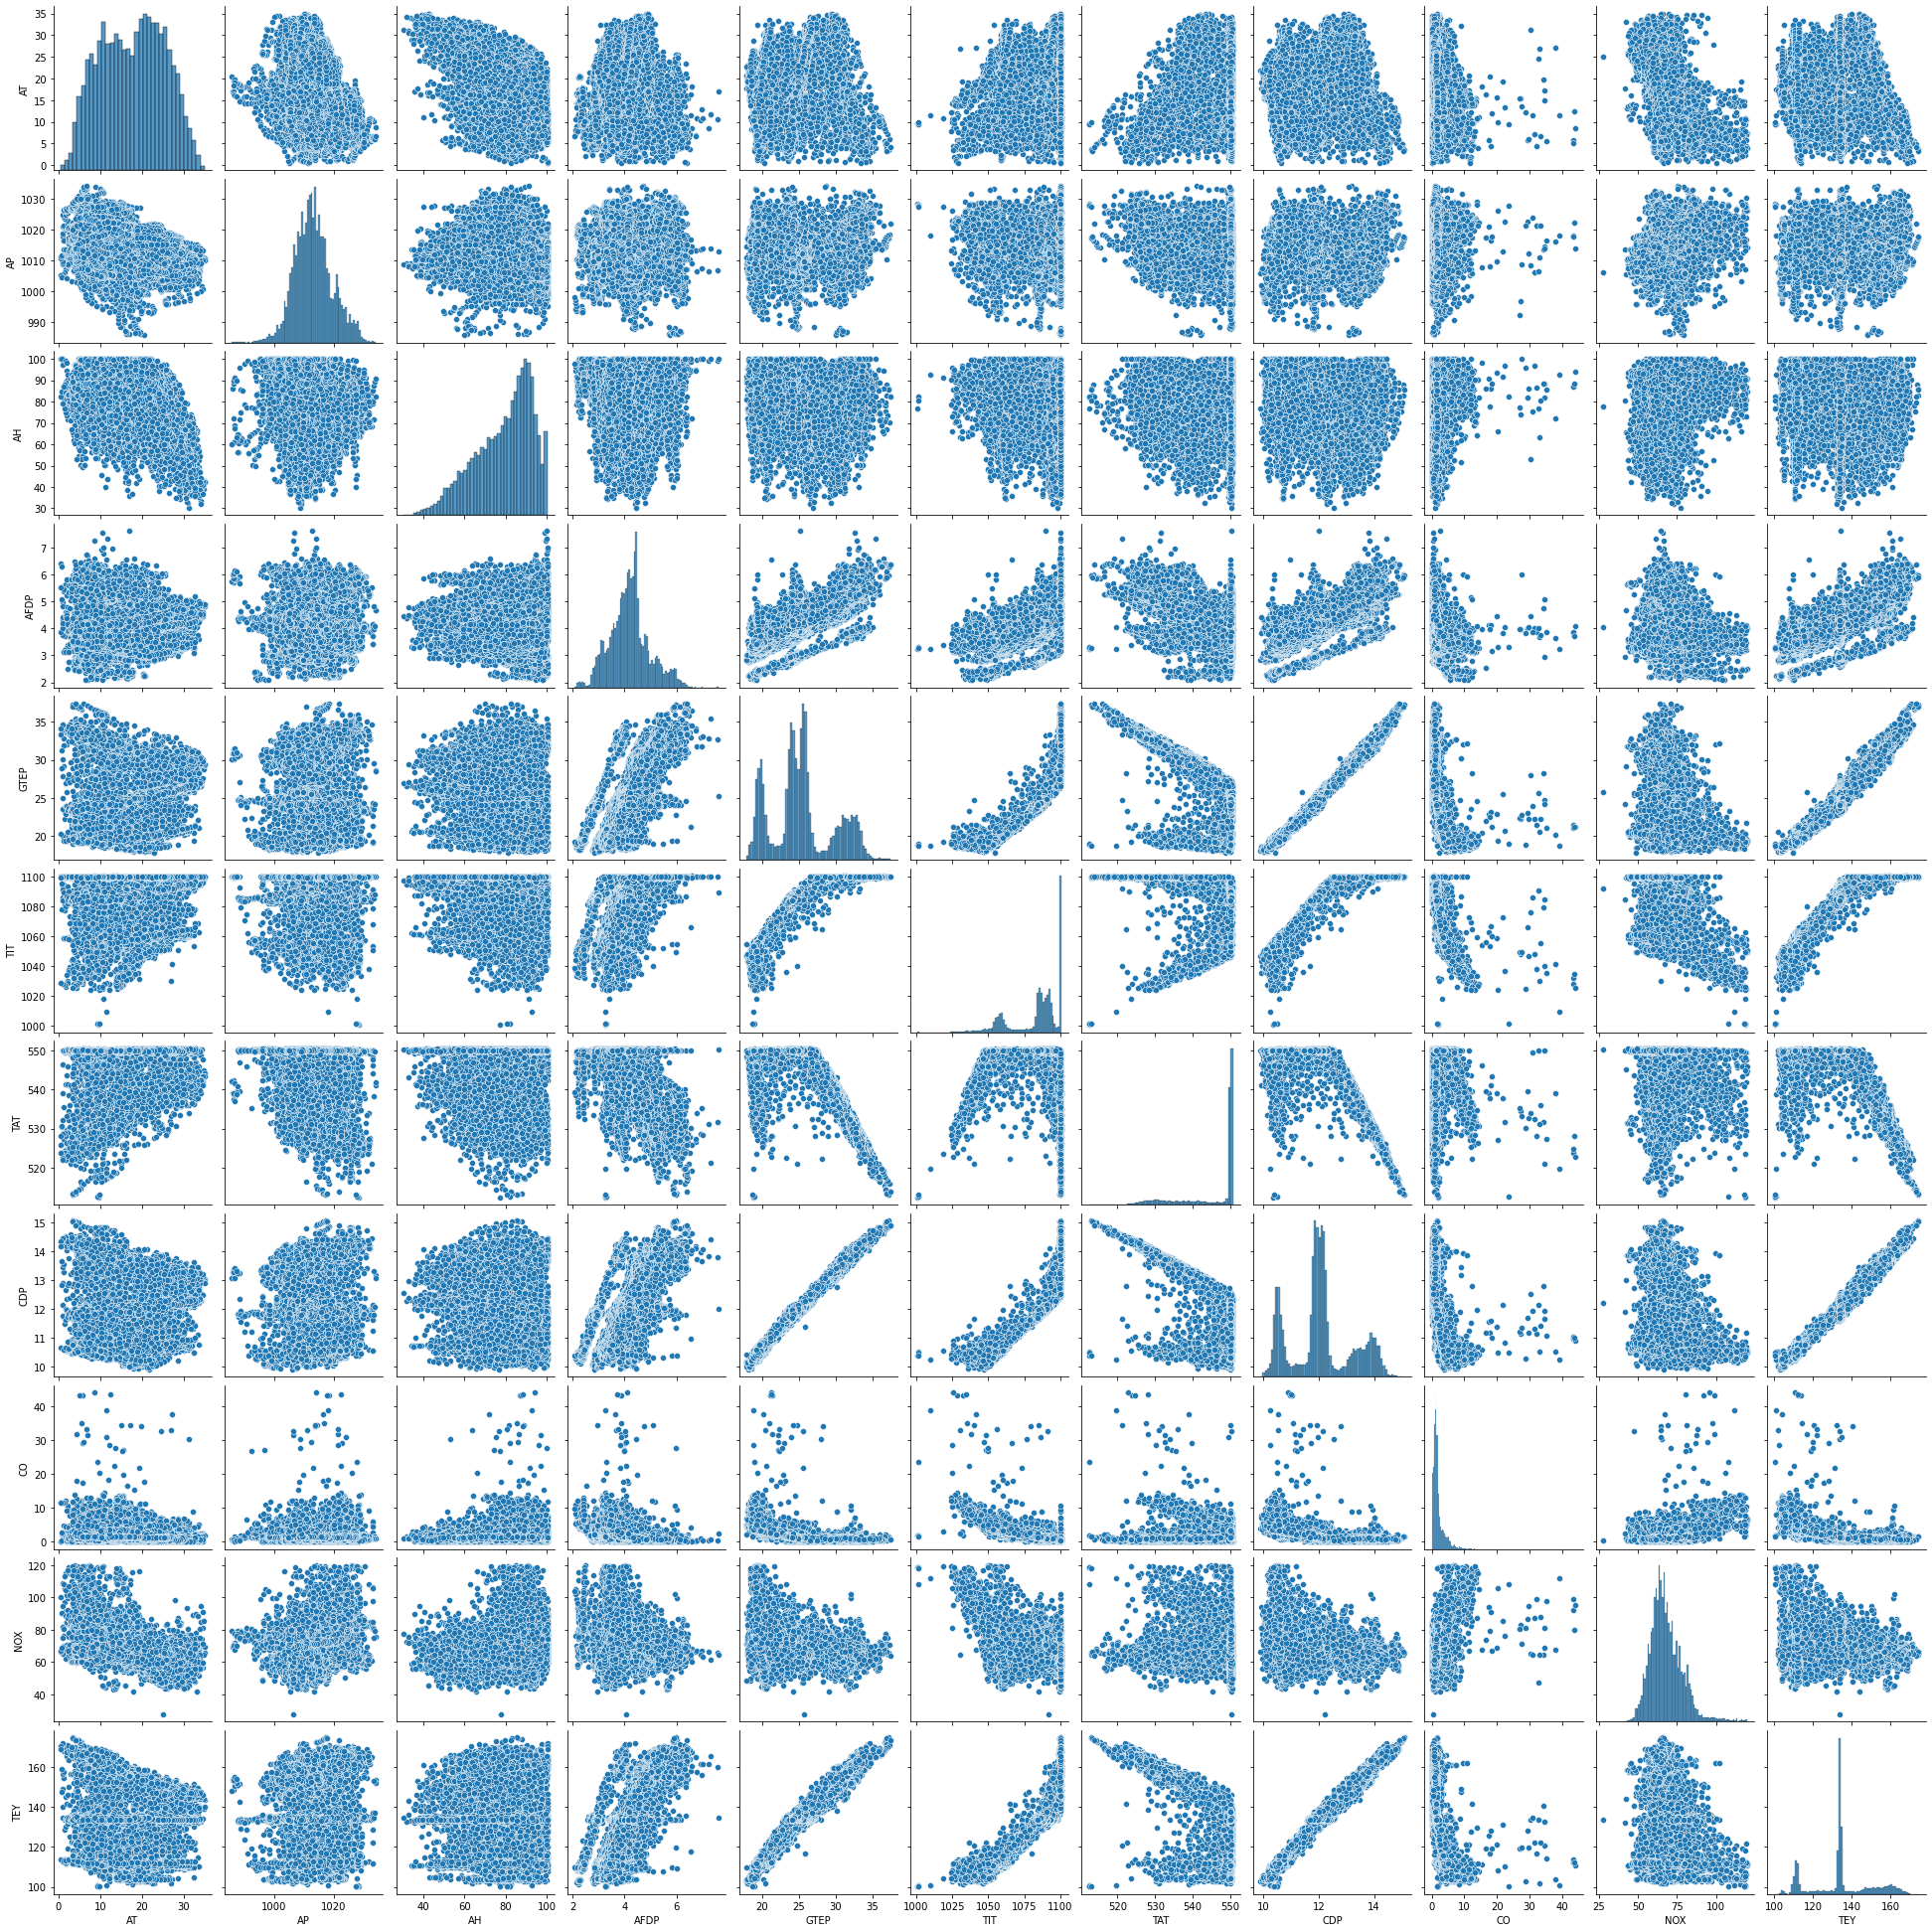

In [70]:
sns.pairplot(data)

In [71]:
data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.100705,-0.088588,-0.600006,-0.207495
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.131198,0.041614,0.256744,0.146939
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.182010,0.165505,0.143061,-0.110272
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.727152,-0.334207,-0.037299,0.717995
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.993784,-0.508259,-0.208496,0.977042
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.887238,-0.688272,-0.231636,0.891587
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.744740,0.063404,0.009888,-0.720356
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,1.000000,-0.520783,-0.169103,0.988473
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.520783,1.000000,0.316743,-0.541751
NOX,-0.600006,0.256744,0.143061,-0.037299,-0.208496,-0.231636,0.009888,-0.169103,0.316743,1.000000,-0.102631


# performing the normalization on the data set 

In [72]:
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX','TEY'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,0.195191
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,0.195459
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,0.195325
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,0.195459
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,0.195459
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,0.153681
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,0.155965
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,0.134605
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,0.141994


# checking for the outliers

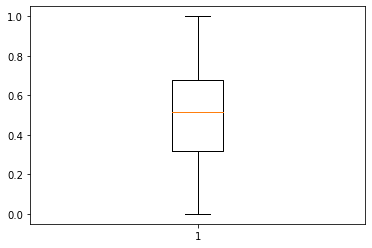

In [73]:
plt.boxplot(data1.AT)
plt.show()

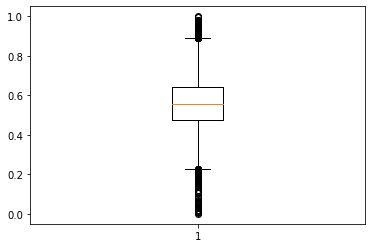

In [74]:
plt.boxplot(data1.AP)
plt.show()

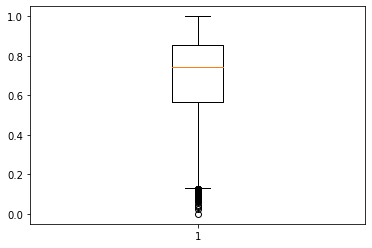

In [75]:
plt.boxplot(data1.AH)
plt.show()

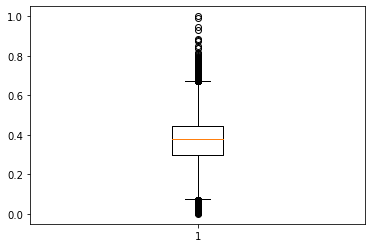

In [76]:
plt.boxplot(data1.AFDP)
plt.show()

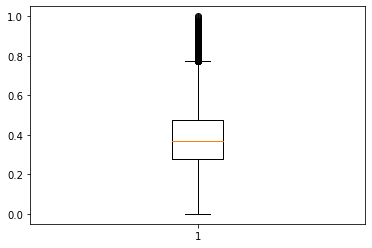

In [77]:
plt.boxplot(data1.GTEP)
plt.show()

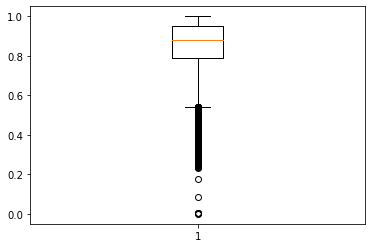

In [78]:
plt.boxplot(data1.TIT)
plt.show()

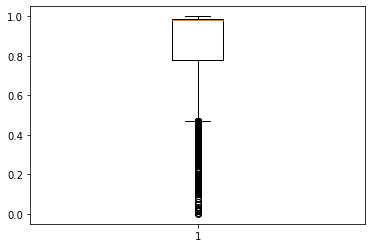

In [79]:
plt.boxplot(data1.TAT)
plt.show()

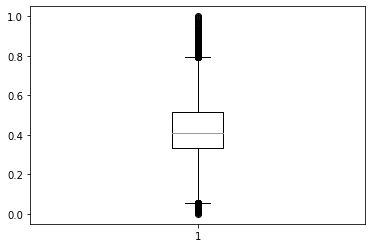

In [80]:
plt.boxplot(data1.CDP)
plt.show()

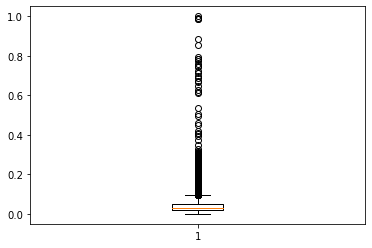

In [81]:
plt.boxplot(data1.CO)
plt.show()

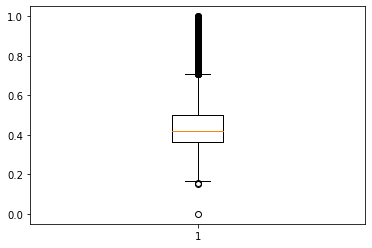

In [82]:
plt.boxplot(data1.NOX)
plt.show()

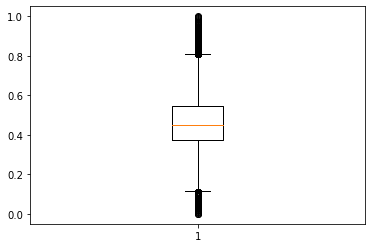

In [83]:
plt.boxplot(data1.TEY)
plt.show()

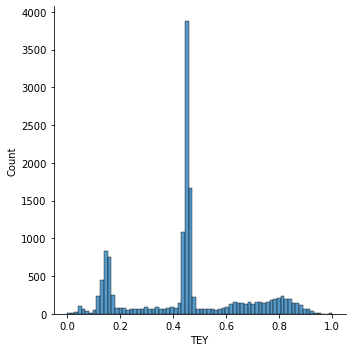

In [84]:
sns.displot(data1.TEY)

In [87]:
x=data1.iloc[:,0:-1]
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [88]:
y=data1.iloc[:,-1]
y

0        0.195191
1        0.195459
2        0.195325
3        0.195459
4        0.195459
           ...   
15034    0.153681
15035    0.155965
15036    0.134605
15037    0.141994
15038    0.153278
Name: TEY, Length: 15039, dtype: float64

# Developing the model of Neural Network

In [101]:
model=Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='linear'))

In [102]:
history=model.compile(loss='mse', optimizer='adam')

In [103]:
history=model.fit(x, y, validation_split=0.33,epochs=100, batch_size=50)

Epoch 1/100
202/202 [==============================] - 2s 6ms/step - loss: 0.1746 - val_loss: 0.0226
Epoch 2/100
202/202 [==============================] - 1s 4ms/step - loss: 0.0168 - val_loss: 7.1744e-04
Epoch 3/100
202/202 [==============================] - 1s 5ms/step - loss: 9.3653e-04 - val_loss: 4.8584e-04
Epoch 4/100
202/202 [==============================] - 1s 5ms/step - loss: 5.9533e-04 - val_loss: 3.5419e-04
Epoch 5/100
202/202 [==============================] - 1s 5ms/step - loss: 3.4888e-04 - val_loss: 2.8273e-04
Epoch 6/100
202/202 [==============================] - 1s 4ms/step - loss: 2.8234e-04 - val_loss: 2.3115e-04
Epoch 7/100
202/202 [==============================] - 1s 5ms/step - loss: 2.1147e-04 - val_loss: 2.0408e-04
Epoch 8/100
202/202 [==============================] - 1s 4ms/step - loss: 1.9783e-04 - val_loss: 1.8160e-04
Epoch 9/100
202/202 [==============================] - 1s 5ms/step - loss: 1.8190e-04 - val_loss: 1.7021e-04
Epoch 10/100
202/202 [=========

In [104]:
score=model.evaluate(x,y)

470/470 [==============================] - 1s 3ms/step - loss: 1.1901e-04


In [105]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

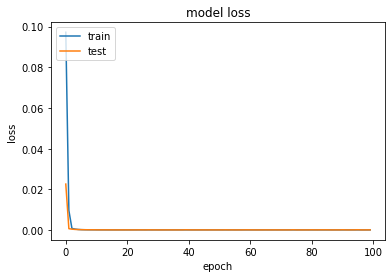

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()